In [1]:
!pip install imgaug

In [2]:
!pip install matplotlib==3.3.0

In [3]:
import os 
import cv2
import matplotlib.pyplot as plt 
from PIL import Image
import json
import numpy as np
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa

In [4]:
def plot_pair(images, gray=False):

    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,10))
    i=0
    
    for y in range(2):
        if gray:
            axes[y].imshow(images[i], cmap='gray')
        else:
            axes[y].imshow(images[i])
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1
    
    plt.show()

In [5]:
def get_poly(ann_path):

  with open(ann_path) as handle:
    data = json.load(handle)

  shape_dicts = data['shapes']

  return shape_dicts

In [6]:
def create_binary_masks(im, shape_dicts):

  blank = np.zeros(shape=(im.shape[0], im.shape[1]), dtype=np.float32)

  for shape in shape_dicts:
    points = np.array(shape['points'], np.int32)
    cv2.fillPoly(blank, [points], 255)

  return blank

In [7]:
import os

path = '/content/drive/MyDrive/mask_gen_demo/masks'

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
  
  # Create a new directory because it does not exist 
  os.makedirs(path)
  print("The new directory is created!")

***Create Binary Masks***

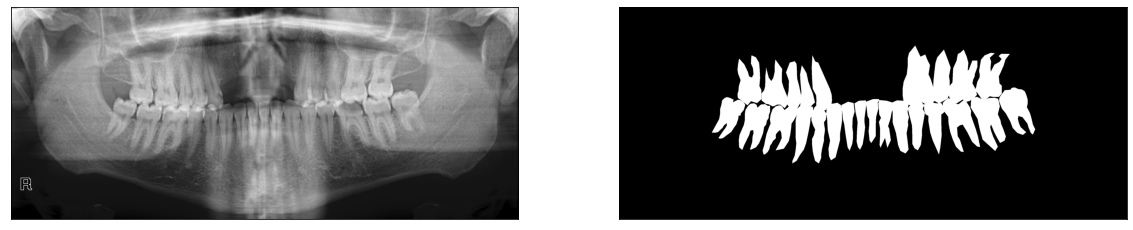

1


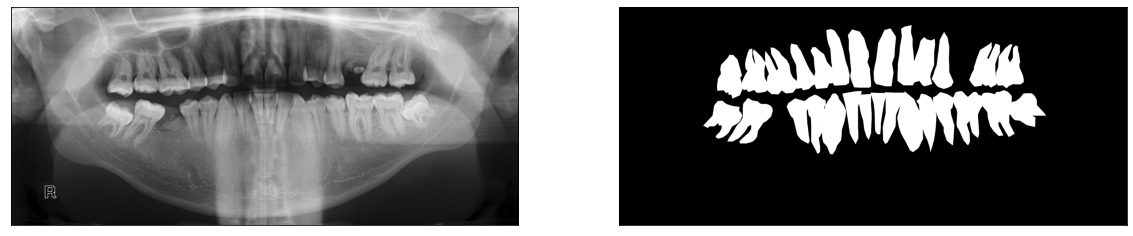

2


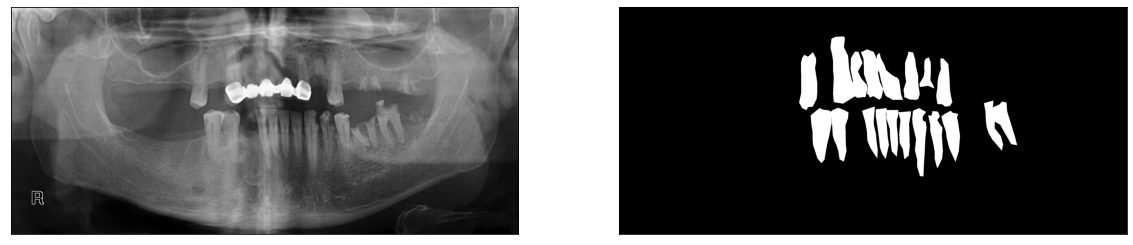

3


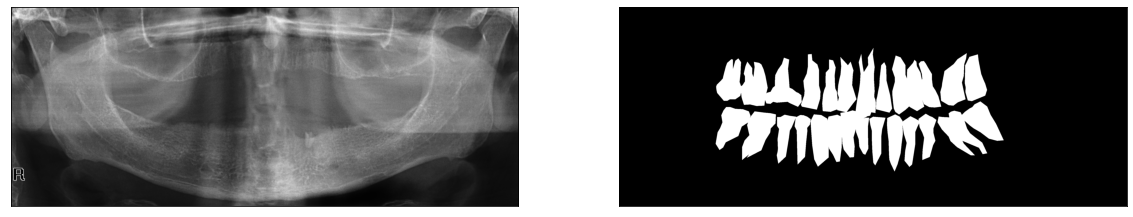

5


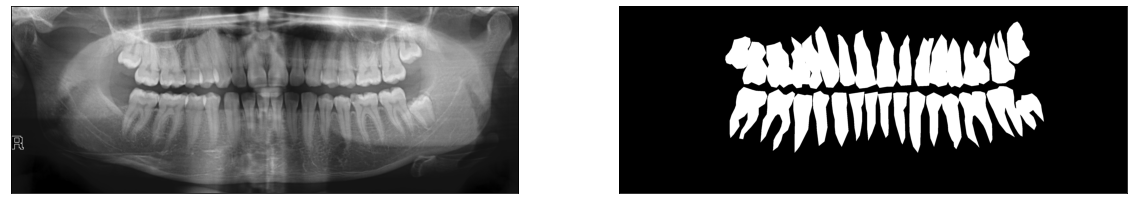

6


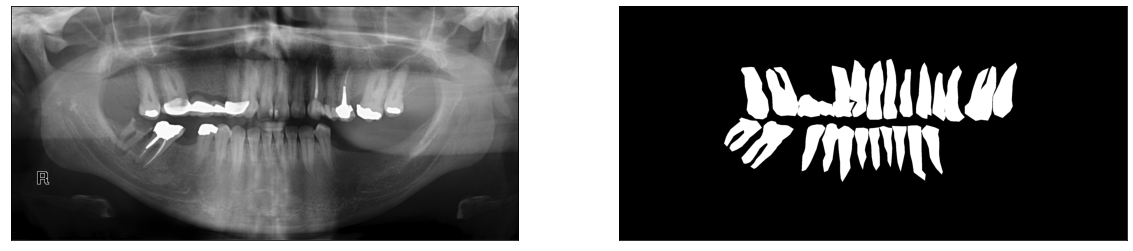

7


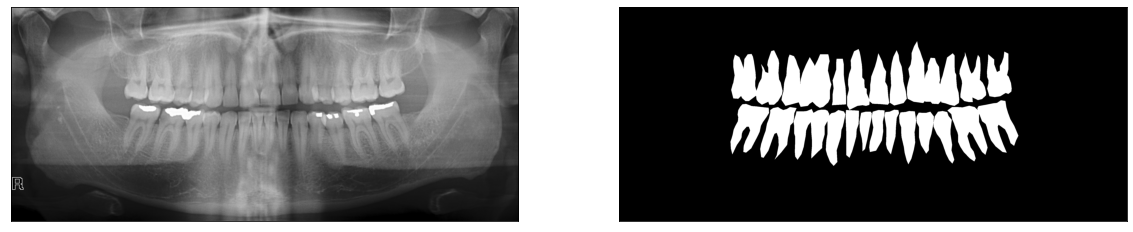

8


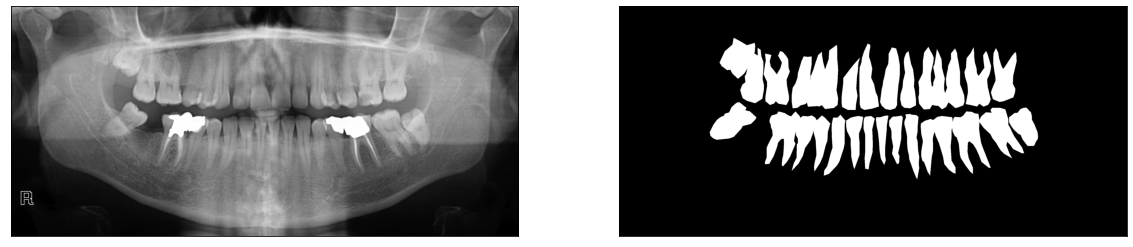

9


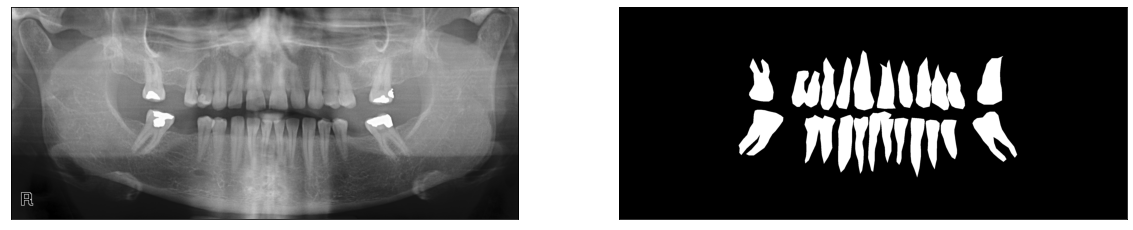

10


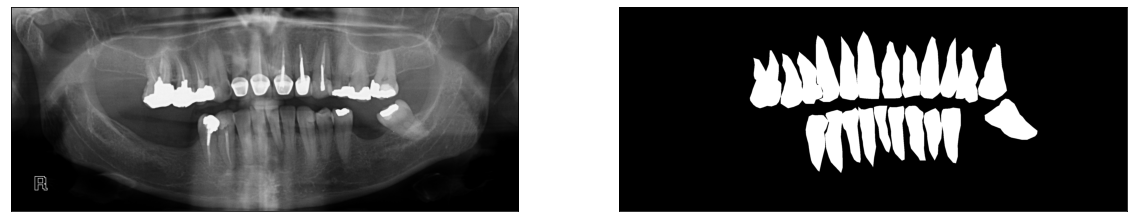

11


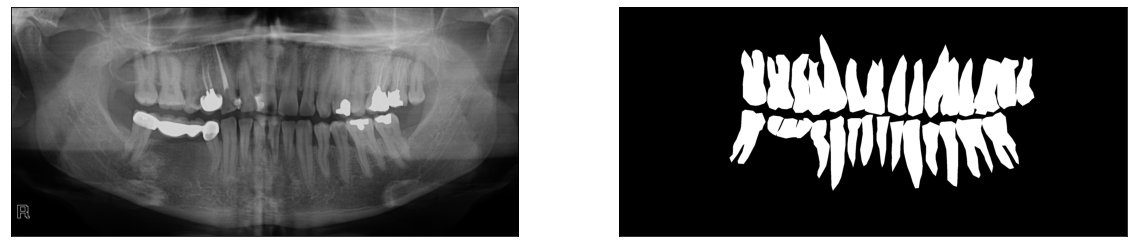

12


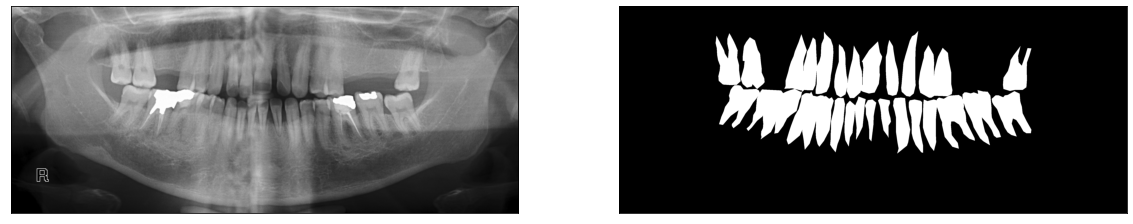

13


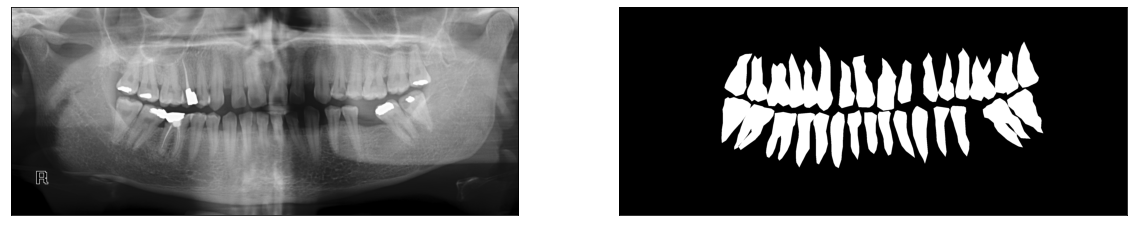

14


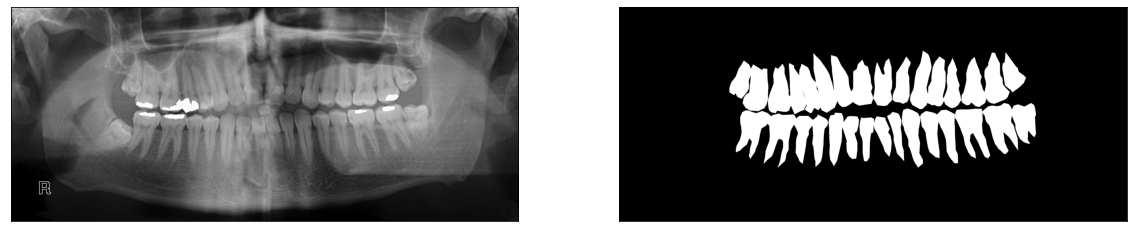

15


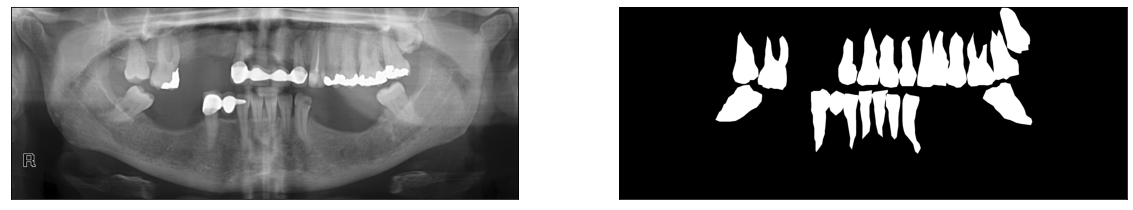

16


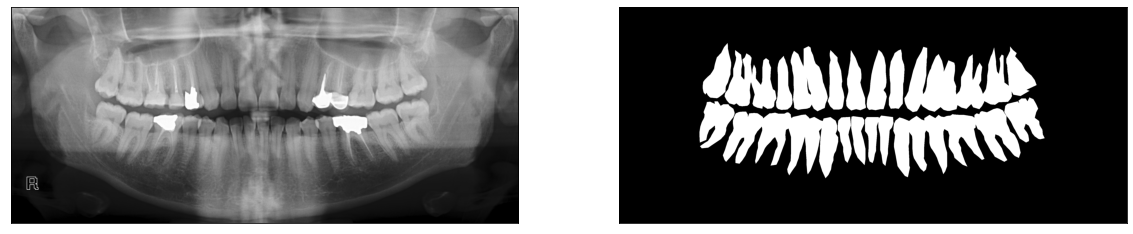

18


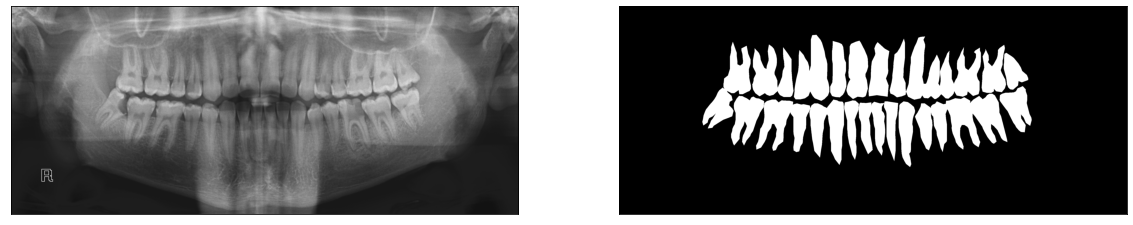

19


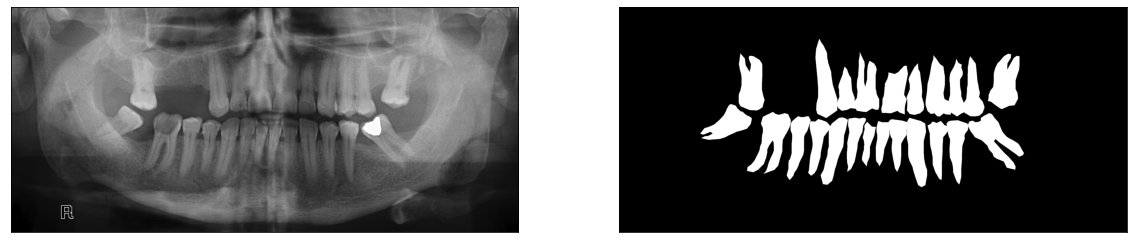

20


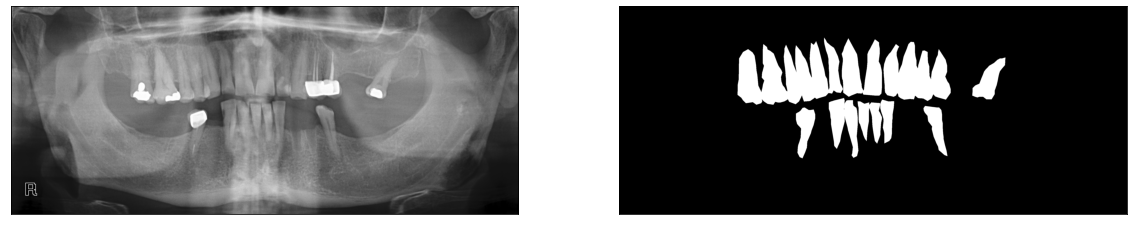

21


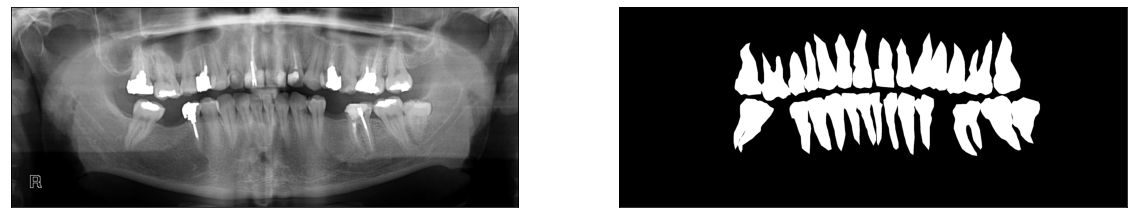

22


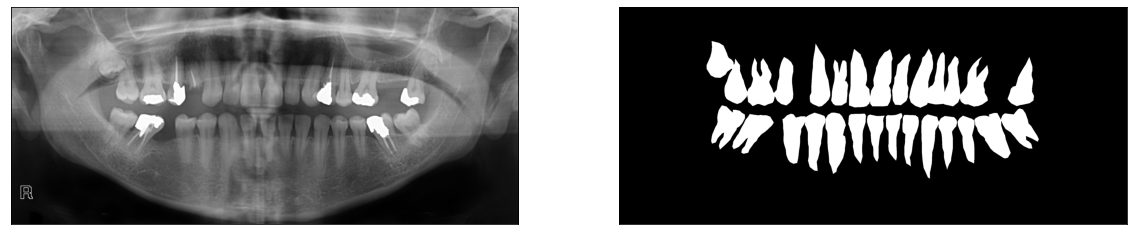

23


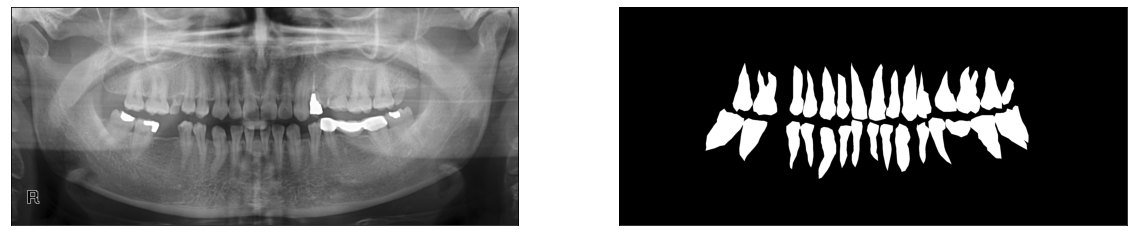

24


In [16]:
image_list = sorted(os.listdir('/content/drive/MyDrive/mask_gen_demo/images'), key=lambda x: int(x.split('.')[0]))
annot_list = sorted(os.listdir('/content/drive/MyDrive/mask_gen_demo/annotations'), key=lambda x: int(x.split('.')[0]))

for im_fn, ann_fn in zip(image_list, annot_list):
    
    im = cv2.imread(os.path.join('/content/drive/MyDrive/mask_gen_demo/images', im_fn))
    
    ann_path = os.path.join('/content/drive/MyDrive/mask_gen_demo/annotations', ann_fn)
    shape_dicts = get_poly(ann_path)
    im_binary = create_binary_masks(im, shape_dicts)
    
    plot_pair([im, im_binary], gray=True)
    plt.show()
    print(os.path.splitext(im_fn)[0])
    #break

In [9]:
os.listdir('/content/drive/MyDrive/mask_gen_demo/images')

['1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '18.png',
 '19.png',
 '2.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '3.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png']

In [10]:
source_folder = os.path.join(os.getcwd(), "/content/drive/MyDrive/mask_gen_demo/images")
source_folder

'/content/drive/MyDrive/mask_gen_demo/images'

In [11]:
import os

path = '/content/drive/MyDrive/mask_gen_demo/masks'

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
  
  # Create a new directory because it does not exist 
  os.makedirs(path)
  print("The new directory is created!")

In [15]:
mask_folder= '/content/drive/MyDrive/mask_gen_demo/masks'

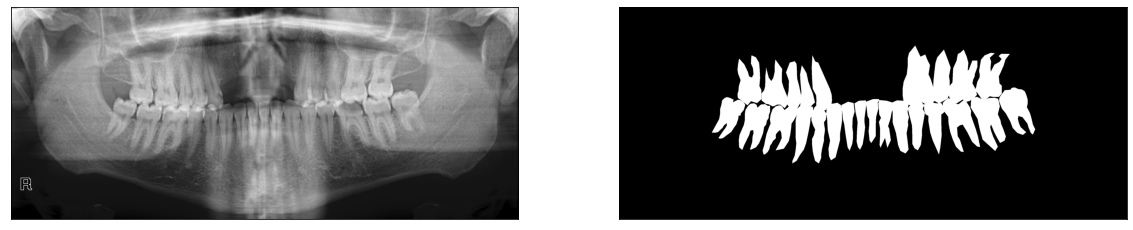

mask saved


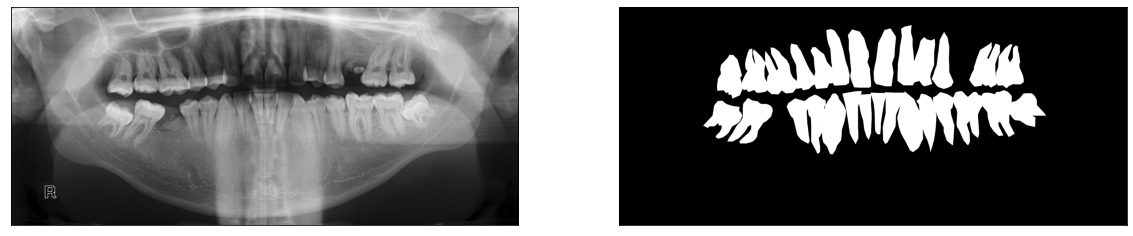

mask saved


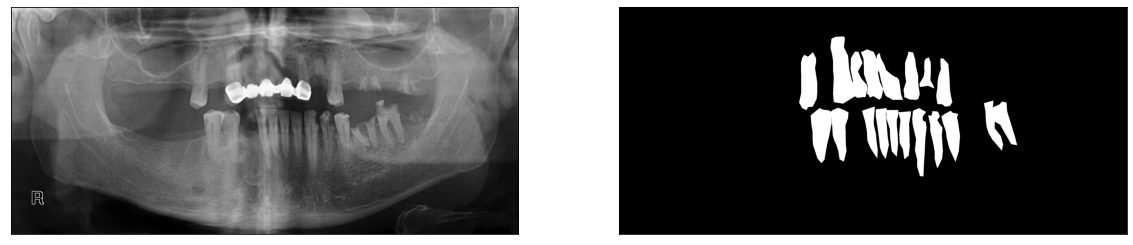

mask saved


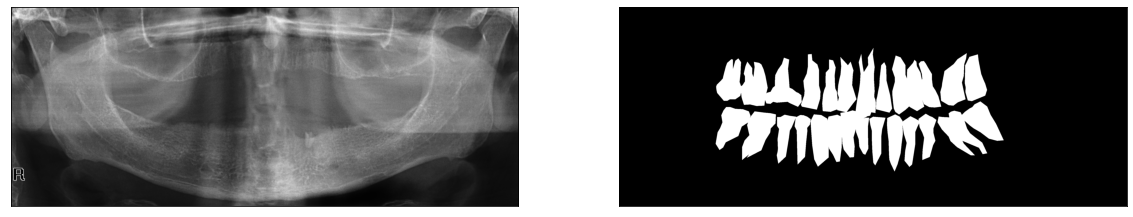

mask saved


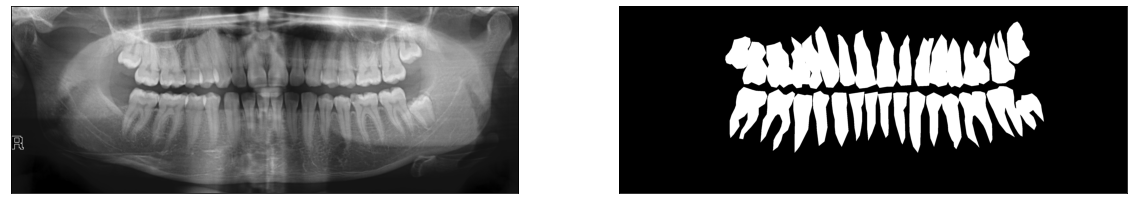

mask saved


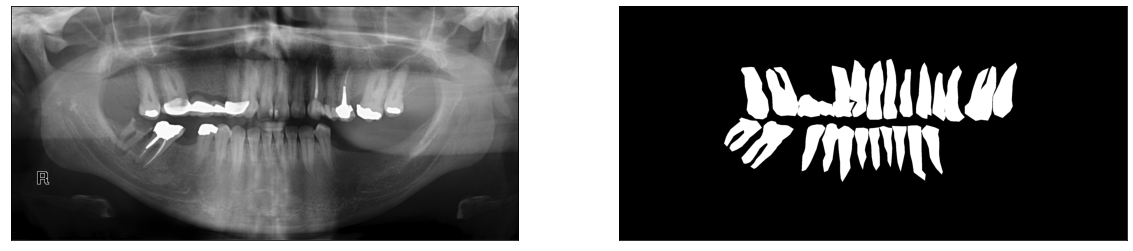

mask saved


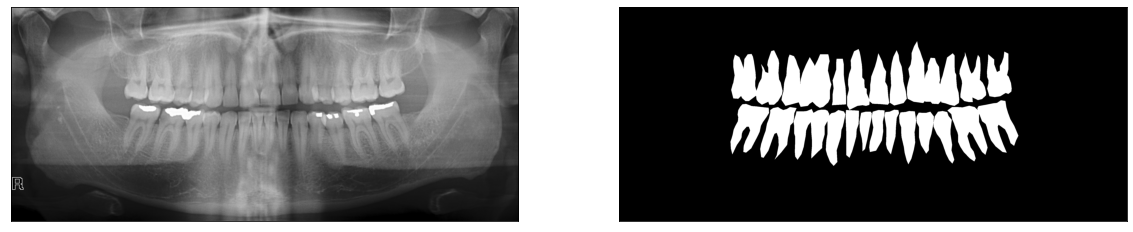

mask saved


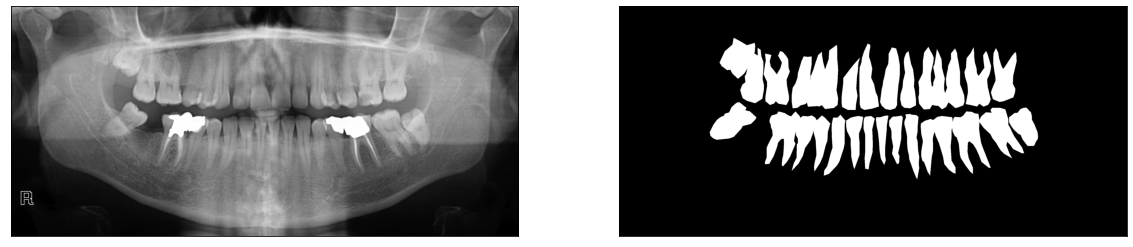

mask saved


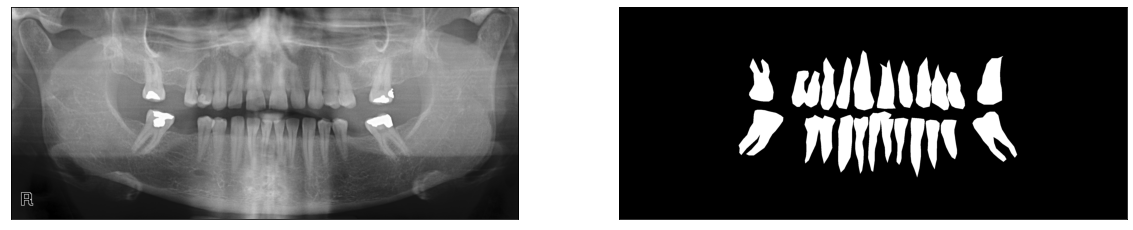

mask saved


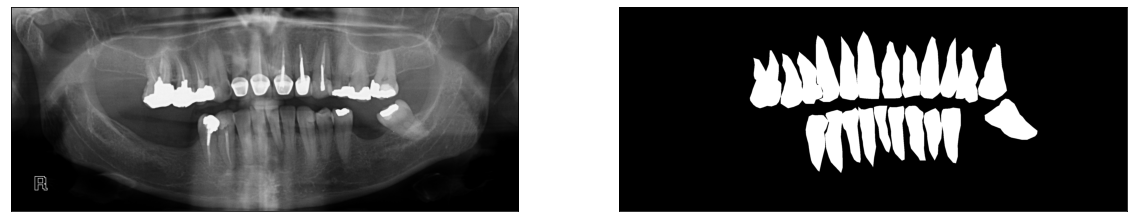

mask saved


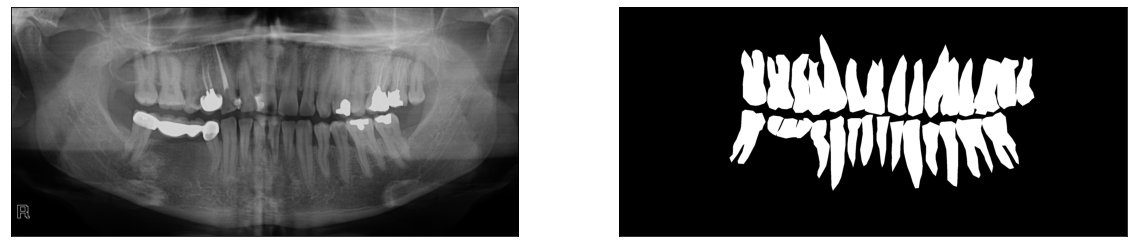

mask saved


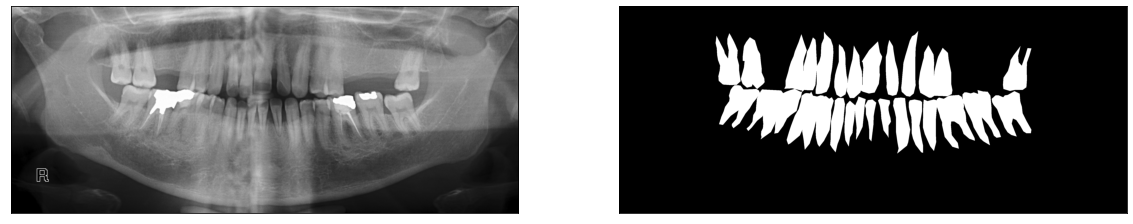

mask saved


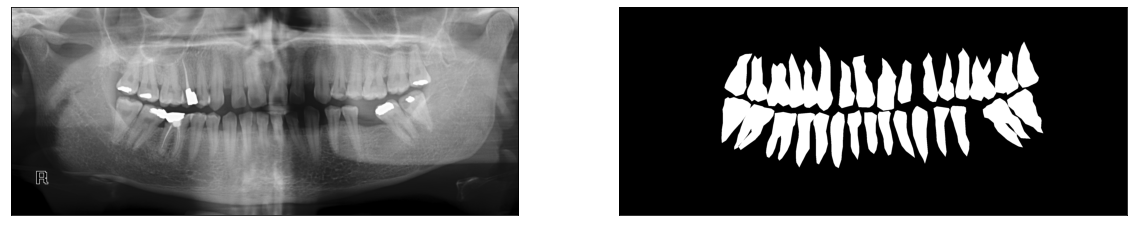

mask saved


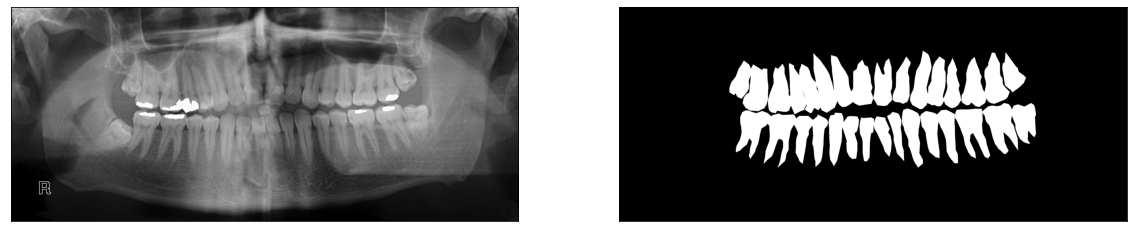

mask saved


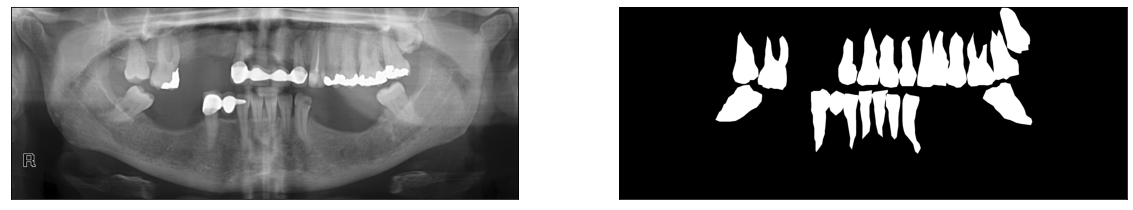

mask saved


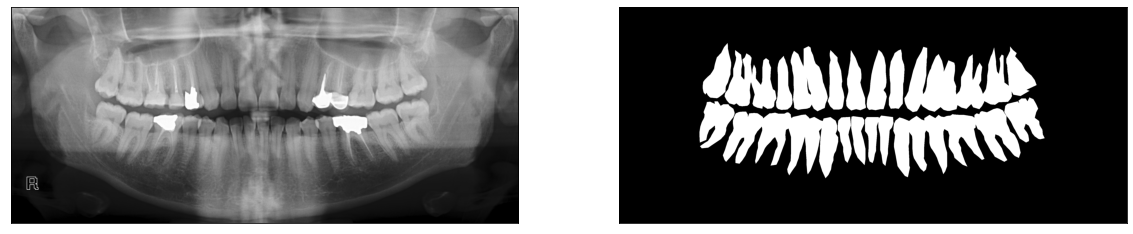

mask saved


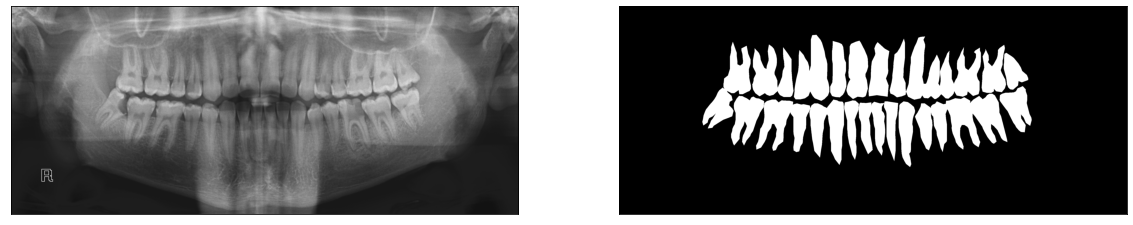

mask saved


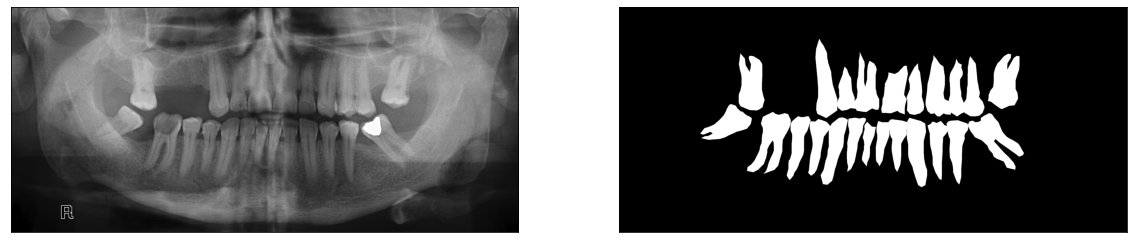

mask saved


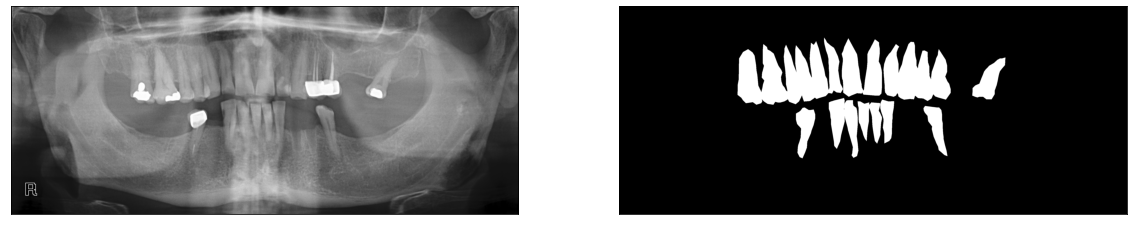

mask saved


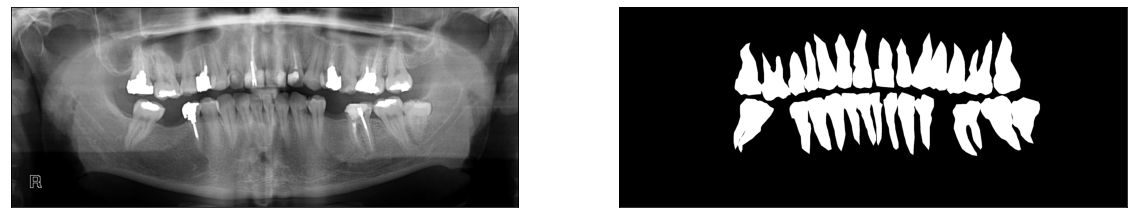

mask saved


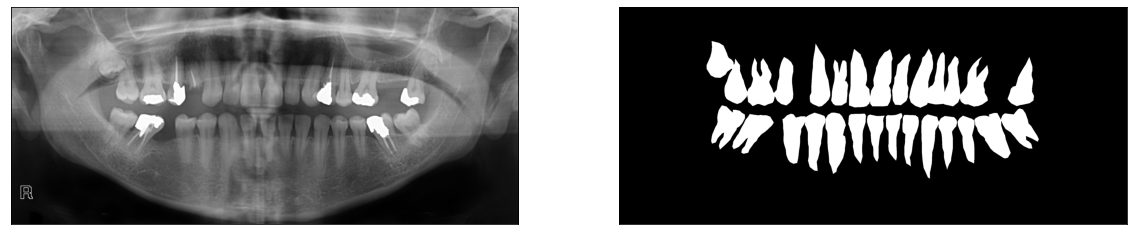

mask saved


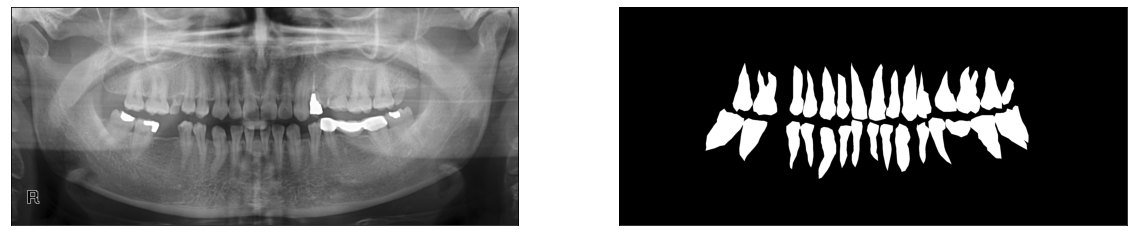

mask saved


In [18]:
image_list = sorted(os.listdir('/content/drive/MyDrive/mask_gen_demo/images'), key=lambda x: int(x.split('.')[0]))
annot_list = sorted(os.listdir('/content/drive/MyDrive/mask_gen_demo/annotations'), key=lambda x: int(x.split('.')[0]))

for im_fn, ann_fn in zip(image_list, annot_list):
    
    im = cv2.imread(os.path.join('/content/drive/MyDrive/mask_gen_demo/images', im_fn))
    
    ann_path = os.path.join('/content/drive/MyDrive/mask_gen_demo/annotations', ann_fn)
    shape_dicts = get_poly(ann_path)
    im_binary = create_binary_masks(im, shape_dicts)
    
    plot_pair([im, im_binary], gray=True)
    plt.show()
    im_name = os.path.splitext(im_fn)[0]
    #break
    cv2.imwrite(os.path.join(mask_folder, im_name + ".png") , im_binary)
    print("mask saved")